<a href="https://colab.research.google.com/github/olaidekashimawo/Go-to-Market-Cab-Industry-Analysis/blob/main/Go_to_Market_Cab_Industry_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**
The Go-to-Market method Cab investment EDA** 

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1. Business problem

* This notebook's main goal is to help stakeholders better understand the market before making investments in the taxi sector using the Go-to-Market (G2M) method. Go-to-market plans frequently emphasize  how any short term profitability can be sustained over a long period of time.

2. Dataset

* There have been provided 4 individual data sets. Time period of data is from 31/01/2016 to 31/12/2018. Below are the list of datasets which are provided for the analysis:

* Cab_Data.csv – this file includes details of transaction for 2 cab companies

* Customer_ID.csv – this is a mapping table that contains a unique identifier which links the customer’s demographic details

* Transaction_ID.csv – this is a mapping table that contains transaction to customer mapping and payment mode

* City.csv – this file contains list of US cities, their population and number of cab users

| Variable       | Description                                                                                                                                                                                                          |
|----------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Cab            | Transaction ID = Unique identify number to each passanger for transaction Date of Travel Company = Preferred company for travel City = City of travel KM Travelled = Distance of travel Price Charged = Amount of money for travel Cost of Trip = Amount of cost for travel Categorical variable: Company, City Numerical Variable: Transaction ID , Date of Travel, KM Travelled, Price Charged, Cost of Trip |
| City           |  City = City names Population = Population of cities Users = Population of cab users for each city Categorical variable: None Numerical Variable: Population, Users                                                                                                                                                                                                                                          |
| Transaction |  Transaction ID = Unique identify number to each passanger for transaction Customer ID = Unique identify number for each passanger Payment_Mode = Payment type, might be cash or card Categorical variable: Payment_Mode Numerical Variable: Transaction ID, Costumer ID                                                                                                                                       |
| Customer    | Customer ID = Unique identify number for each passanger  Gender = Gender of each passanger (Male/Female) Age = Age of each passanger Income (USD/Month) = Amount of income for each passanger Categorical variable: Gender, Age Numerical Variable: Customer ID, Income                                                                                                                                        |
Author : Olaide Kashimawo

In [5]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns 
sns.set()
import folium 
import warnings
warnings.filterwarnings('ignore')

### Import data from the drive

In [6]:
Transactions = pd.read_csv('/content/drive/MyDrive/Transaction_ID.csv')
Customers = pd.read_csv('/content/drive/MyDrive/Customer_ID.csv')
Cab = pd.read_csv('/content/drive/MyDrive/Cab_Data.csv')
Cities = pd.read_csv('/content/drive/MyDrive/City.csv')

In [7]:
Transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [8]:
Customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [9]:
Cab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


In [10]:
Cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [11]:
#Cities.City
Cab["City"].unique()

array(['ATLANTA GA', 'AUSTIN TX', 'BOSTON MA', 'CHICAGO IL', 'DALLAS TX',
       'DENVER CO', 'LOS ANGELES CA', 'MIAMI FL', 'NASHVILLE TN',
       'NEW YORK NY', 'ORANGE COUNTY', 'PHOENIX AZ', 'PITTSBURGH PA',
       'SACRAMENTO CA', 'SAN DIEGO CA', 'SEATTLE WA', 'SILICON VALLEY',
       'TUCSON AZ', 'WASHINGTON DC'], dtype=object)

### Merging the data 

In [12]:
merge_data = Cab.merge(Transactions, on= 'Transaction ID').merge(Customers,on ='Customer ID').merge(Cities, on = 'City')
print('raws = ',merge_data.shape[0], 'Columns = ', merge_data.shape[1])

merge_data.info()


raws =  359392 Columns =  14
<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Transaction ID      359392 non-null  int64  
 1   Date of Travel      359392 non-null  int64  
 2   Company             359392 non-null  object 
 3   City                359392 non-null  object 
 4   KM Travelled        359392 non-null  float64
 5   Price Charged       359392 non-null  float64
 6   Cost of Trip        359392 non-null  float64
 7   Customer ID         359392 non-null  int64  
 8   Payment_Mode        359392 non-null  object 
 9   Gender              359392 non-null  object 
 10  Age                 359392 non-null  int64  
 11  Income (USD/Month)  359392 non-null  int64  
 12  Population          359392 non-null  object 
 13  Users               359392 non-null  object 
dtypes: float64(3), int64(5), object(6)
memory usage: 41.1+ 

In [13]:
merge_data.sample(5)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
190631,10260183,43055,Yellow Cab,NEW YORK NY,2.30,59.74,32.0160,1875,Cash,Male,50,5382,"8,405,837","302,149"
193578,10089876,42658,Yellow Cab,NEW YORK NY,41.07,842.06,537.1956,1368,Card,Female,60,7030,"8,405,837","302,149"
75458,10246377,43037,Yellow Cab,CHICAGO IL,11.33,152.15,159.0732,5016,Cash,Male,26,25772,"1,955,130","164,468"
25205,10020623,42455,Yellow Cab,BOSTON MA,9.90,140.91,124.7400,59719,Card,Male,28,17379,"248,968","80,021"
335930,10016327,42442,Yellow Cab,WASHINGTON DC,27.84,411.16,347.4432,52840,Card,Female,64,21108,"418,859","127,001"


In [14]:
merge_data.isnull().sum()

Transaction ID        0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
Population            0
Users                 0
dtype: int64

### Data Engineering

#### Convert date fields to datetime format

In [15]:
# Convert date fields to datetime format
from datetime import datetime
def to_date_format(n):
    
    """
    Converts an excel serial date number to a Python datetime object.
    Excel serial date numbers are the number of days elapsed since 1900-01-01.
    """
    
    date_str =(datetime(1900,1,1) + timedelta(n-1)).strftime("%d-%m-%Y")
    date_date =  datetime.strptime(date_str, "%d-%m-%Y")
    return date_date

merge_data['Date of Travel'] = merge_data['Date of Travel'].map(lambda date : datetime.fromordinal(datetime(1900,1,1).toordinal() + date))

In [16]:
# Calculating profit per rides
merge_data['profit']=merge_data['Price Charged']-merge_data['Cost of Trip']


In [17]:
# Calculate profit per mile
merge_data['profit/mile'] = merge_data['profit'] / (merge_data['KM Travelled'] / 1.60934)
merge_data['profit/mile'].head(10)

0     3.029206
1    17.284103
2     7.362040
3     1.330770
4    11.235334
5    13.252628
6     3.016281
7     4.907775
8     8.538118
9    10.526057
Name: profit/mile, dtype: float64

#### Renaming KM Travelled to Miles Travelled

In [18]:
merge_data.rename(columns={'KM Travelled': 'Miles Travelled'}, inplace=True)
merge_data['Miles Travelled'] = merge_data['Miles Travelled'] / 1.60934

In [19]:
Cities['Population'] = Cities['Population'].str.replace(',', '').astype(int)
Cities['Users'] = Cities['Users'].str.replace(',', '').astype(int)
Cities.head(2)

,City,Population,Users
0,NEW YORK NY,8405837,302149
1,CHICAGO IL,1955130,164468


In [20]:
merge_data.sample(4)

,Transaction ID,Date of Travel,Company,City,Miles Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,profit,profit/mile
188174,10115458,2016-12-02,Yellow Cab,NEW YORK NY,19.629165,871.78,390.4524,1856,Card,Male,23,8506,"8,405,837","302,149",481.3276,24.521043
75780,10405054,2018-11-10,Yellow Cab,CHICAGO IL,1.329738,33.39,28.2480,3201,Cash,Female,22,11844,"1,955,130","164,468",5.1420,3.866928
19855,10246194,2017-11-02,Yellow Cab,BOSTON MA,21.263375,447.97,427.0656,57923,Card,Male,30,28371,"248,968","80,021",20.9044,0.983118
301139,10244439,2017-10-23,Yellow Cab,SEATTLE WA,19.486249,552.61,402.6624,37821,Card,Female,38,13270,"671,238","25,063",149.9476,7.695047


#### Extracted day of the week, month and add it as a new column 'day_of_week' and 'month'

In [21]:
# Convert 'Date of Travel' column to datetime format
merge_data['Date of Travel'] = pd.to_datetime(merge_data['Date of Travel'])

# Extract day of the week and add it as a new column 'day_of_week'
merge_data['day_of_week'] = merge_data['Date of Travel'].dt.day_name()

# Extract month and add it as a new column 'month'
merge_data['month'] = merge_data['Date of Travel'].dt.month_name()

# Extract year and add it as a new column 'year'
merge_data['year'] = pd.DatetimeIndex(merge_data['Date of Travel']).year

# Display the first 5 rows of the updated dataframe
merge_data.head()


,Transaction ID,Date of Travel,Company,City,Miles Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,profit,profit/mile,day_of_week,month,year
0,10000011,2016-01-10,Pink Cab,ATLANTA GA,18.920800,370.95,313.6350,29290,Card,Male,28,10813,"814,885","24,701",57.3150,3.029206,Sunday,January,2016
1,10351127,2018-07-23,Yellow Cab,ATLANTA GA,16.273752,598.70,317.4228,29290,Cash,Male,28,10813,"814,885","24,701",281.2772,17.284103,Monday,July,2018
2,10412921,2018-11-25,Yellow Cab,ATLANTA GA,26.439410,792.05,597.4020,29290,Card,Male,28,10813,"814,885","24,701",194.6480,7.362040,Sunday,November,2018
3,10000012,2016-01-08,Pink Cab,ATLANTA GA,17.783688,358.52,334.8540,27703,Card,Male,27,9237,"814,885","24,701",23.6660,1.330770,Friday,January,2016
4,10320494,2018-04-23,Yellow Cab,ATLANTA GA,22.605540,721.10,467.1192,27703,Card,Male,27,9237,"814,885","24,701",253.9808,11.235334,Monday,April,2018


#### Removing commas from 'Population' and 'Users' column

In [22]:
# remove commas from 'Population' column
merge_data['Population'] = merge_data['Population'].replace(',', '', regex=True)
# remove commas from 'User Code' column
merge_data['Users'] = merge_data['Users'].replace(',', '', regex=True)
# display the updated dataframe
merge_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      359392 non-null  int64         
 1   Date of Travel      359392 non-null  datetime64[ns]
 2   Company             359392 non-null  object        
 3   City                359392 non-null  object        
 4   Miles Travelled     359392 non-null  float64       
 5   Price Charged       359392 non-null  float64       
 6   Cost of Trip        359392 non-null  float64       
 7   Customer ID         359392 non-null  int64         
 8   Payment_Mode        359392 non-null  object        
 9   Gender              359392 non-null  object        
 10  Age                 359392 non-null  int64         
 11  Income (USD/Month)  359392 non-null  int64         
 12  Population          359392 non-null  object        
 13  Users               359392 no

In [23]:
round(merge_data.describe(include='all'),2)

,Transaction ID,Date of Travel,Company,City,Miles Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,profit,profit/mile,day_of_week,month,year
count,359392.00,359392,359392,359392,359392.00,359392.00,359392.00,359392.00,359392,359392,359392.00,359392.00,359392,359392,359392.00,359392.00,359392,359392,359392.00
unique,NaN,1095,2,19,NaN,NaN,NaN,NaN,2,2,NaN,NaN,19,19,NaN,NaN,7,12,NaN
top,NaN,2018-01-07 00:00:00,Yellow Cab,NEW YORK NY,NaN,NaN,NaN,NaN,Card,Male,NaN,NaN,8405837,302149,NaN,NaN,Sunday,December,NaN
freq,NaN,2022,274681,99885,NaN,NaN,NaN,NaN,215504,205912,NaN,NaN,99885,99885,NaN,NaN,81402,46736,NaN
first,NaN,2016-01-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2019-01-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,10220761.19,NaN,NaN,NaN,14.02,423.44,286.19,19191.65,NaN,NaN,35.34,15048.82,NaN,NaN,137.25,9.79,NaN,NaN,2017.05
std,126805.80,NaN,NaN,NaN,7.60,274.38,157.99,21012.41,NaN,NaN,12.59,7969.41,NaN,NaN,160.31,8.92,NaN,NaN,0.80
min,10000011.00,NaN,NaN,NaN,1.18,15.60,19.00,1.00,NaN,NaN,18.00,2000.00,NaN,NaN,-220.06,-8.04,NaN,NaN,2016.00
25%,10110809.75,NaN,NaN,NaN,7.46,206.44,151.20,2705.00,NaN,NaN,25.00,8424.00,NaN,NaN,28.01,3.22,NaN,NaN,2016.00


### Data Exploration


- 19 Features after merging

- Timeframe of the data: 2016-01-31 to 2018-12-31

- Total data points :359391

- No missing values

In [24]:
for col in merge_data.columns:
    print(merge_data[col].value_counts())
    print("----------------------------------------------------")

10000011    1
10287084    1
10398109    1
10394342    1
10390786    1
           ..
10213462    1
10182827    1
10172933    1
10156920    1
10370709    1
Name: Transaction ID, Length: 359392, dtype: int64
----------------------------------------------------
2018-01-07    2022
2017-12-17    1123
2017-12-10    1100
2018-12-17    1086
2017-11-26    1085
              ... 
2016-01-21      88
2016-01-14      86
2016-01-13      85
2016-01-07      47
2016-01-06      25
Name: Date of Travel, Length: 1095, dtype: int64
----------------------------------------------------
Yellow Cab    274681
Pink Cab       84711
Name: Company, dtype: int64
----------------------------------------------------
NEW YORK NY       99885
CHICAGO IL        56625
LOS ANGELES CA    48033
WASHINGTON DC     43737
BOSTON MA         29692
SAN DIEGO CA      20488
SILICON VALLEY     8519
SEATTLE WA         7997
ATLANTA GA         7557
DALLAS TX          7017
MIAMI FL           6454
AUSTIN TX          4896
ORANGE COUNTY      3

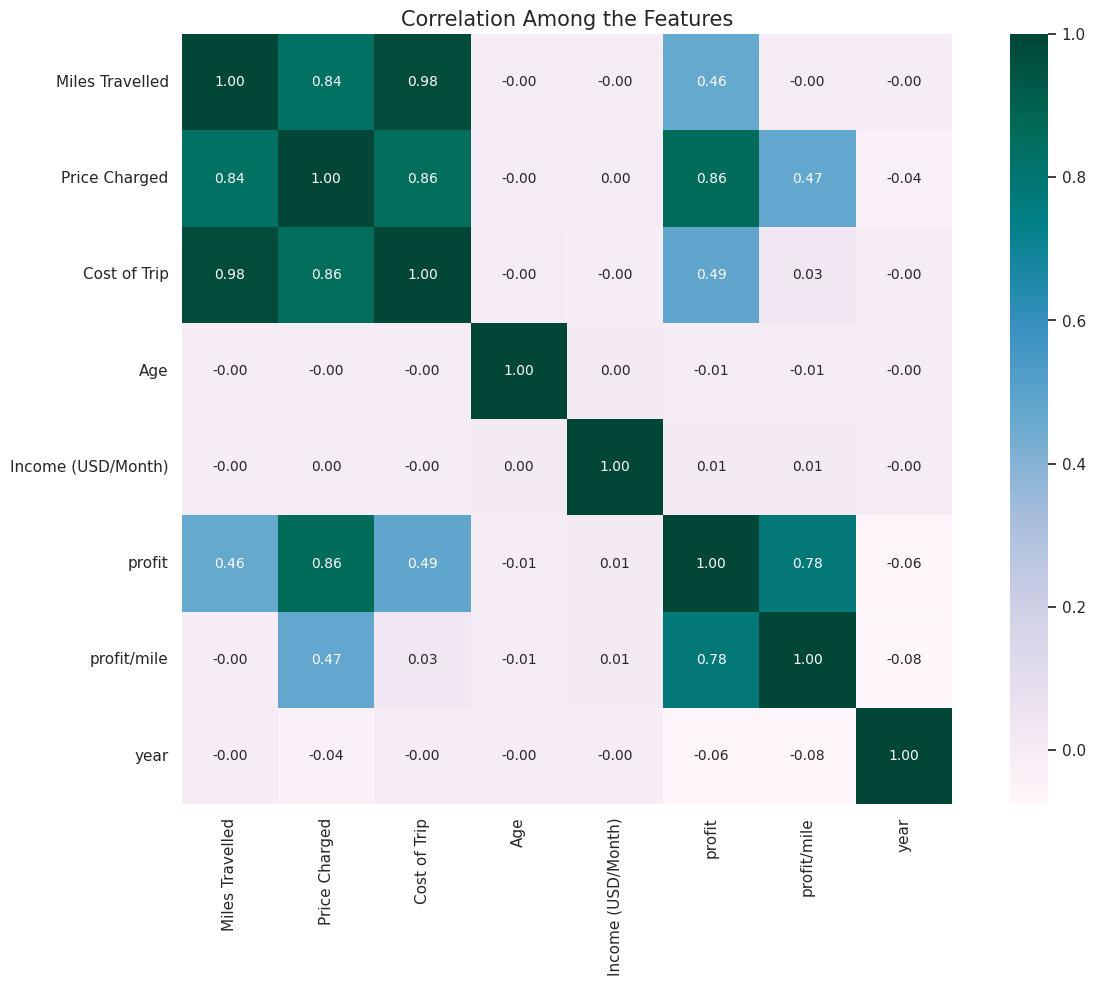

In [25]:
# Drop irrelevant columns
feature_corr = merge_data.drop(["Transaction ID", "Customer ID"], axis=1)

# Create correlation matrix
corr = feature_corr.corr()

# Visualize correlation matrix using heatmap
plt.figure(figsize=(15,10))
sns.heatmap(corr, cbar=True, square=True, annot=True, fmt=".2f", annot_kws={"size": 10},
            cmap="PuBuGn")
plt.title('Correlation Among the Features', fontsize=15)
plt.show()

Features with high correlation Miles travelled, Cost of Trip and Cost of Trip,



#### Feature Analysis

#### Customer demographics analysis

In [26]:
# Customer demographics analysis
age_mean = merge_data.groupby('Company')['Age'].mean()
gender_count = merge_data.groupby(['Company', 'Gender'])['Customer ID'].count()
income_median = merge_data.groupby('Company')['Income (USD/Month)'].median()

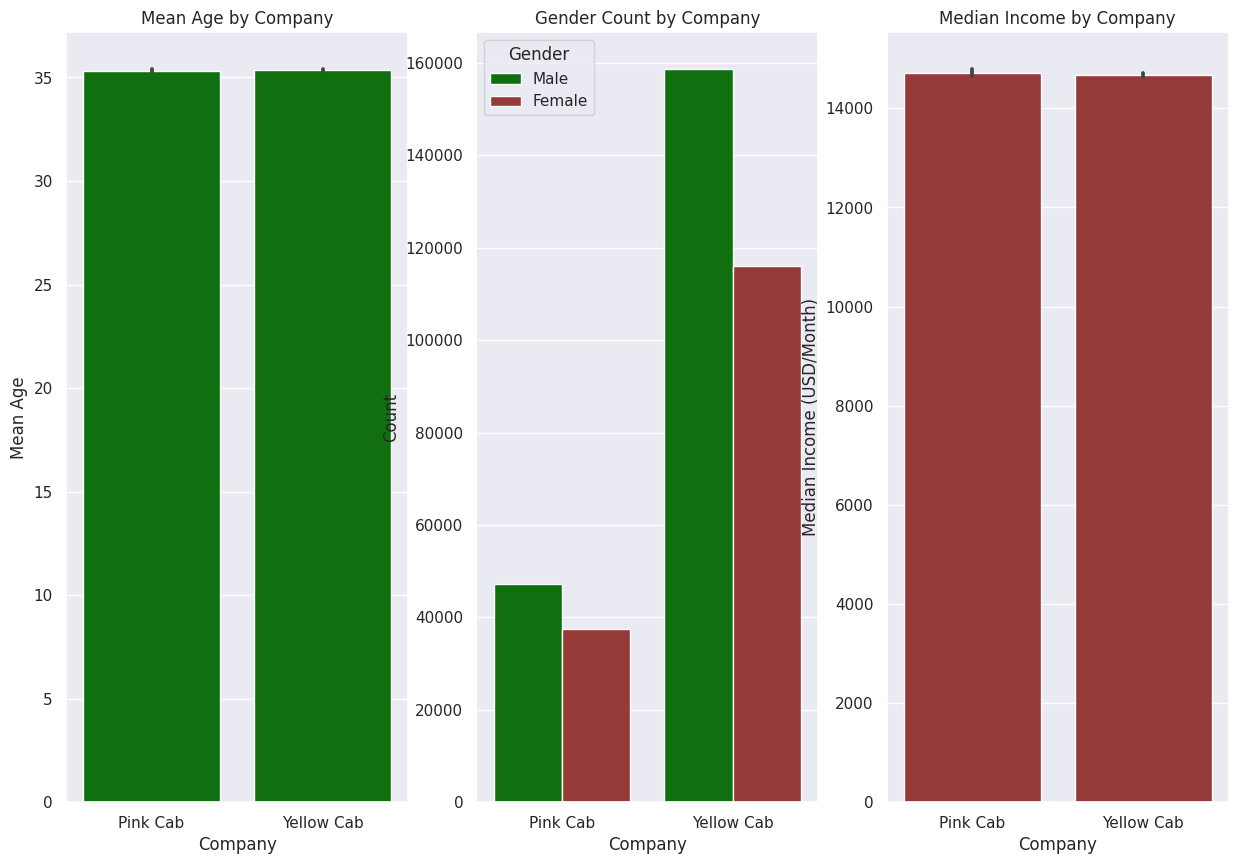

In [27]:
# Create subplots for each metric
fig, ax = plt.subplots(1, 3, figsize=(15, 10))

# Plot the mean age for each company
sns.barplot(x='Company', y='Age', data=merge_data, ax=ax[0], color='green')
ax[0].set_xlabel('Company')
ax[0].set_ylabel('Mean Age')
ax[0].set_title('Mean Age by Company')

# Plot the gender count for each company
sns.countplot(x='Company', hue='Gender', data=merge_data, ax=ax[1], palette=['green', 'brown'])
ax[1].set_xlabel('Company')
ax[1].set_ylabel('Count')
ax[1].set_title('Gender Count by Company')

#  Plot the median income for each company
sns.barplot(x='Company', y='Income (USD/Month)', data=merge_data, estimator=np.median, ax=ax[2], color='brown')
ax[2].set_xlabel('Company')
ax[2].set_ylabel('Median Income (USD/Month)')
ax[2].set_title('Median Income by Company')

# Show the plot
plt.show()


The average age for both the pink and yellow cab is 35. The yellow cab has more male customer. The mean income of both customer is above $14,000.00

#### Distance Travelled (Miles)

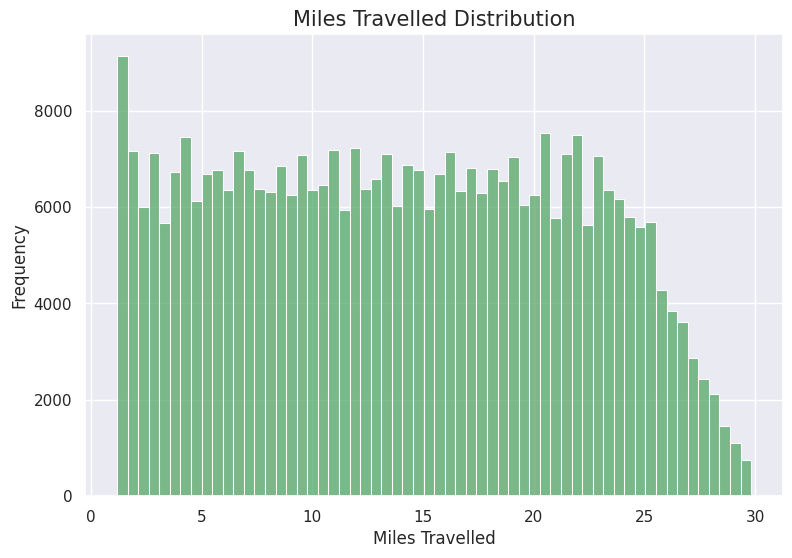

In [28]:
plt.figure(figsize=(9,6))
ax=sns.histplot(data=merge_data, x="Miles Travelled",bins=60, color= 'g')
plt.title('Miles Travelled Distribution', fontsize=15)
plt.ylabel('Frequency')
plt.xlabel('Miles Travelled')
plt.show()

Text(0.5, 0, 'Cost of Trip')

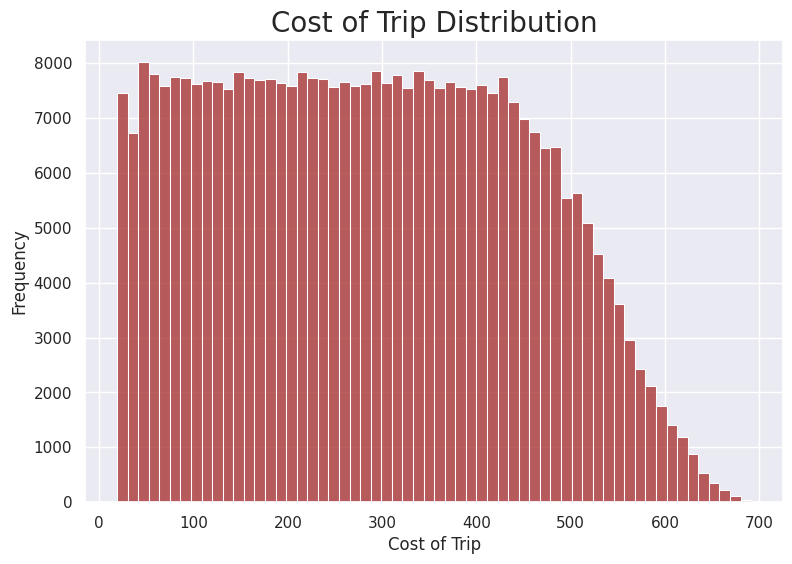

In [29]:
plt.figure(figsize=(9,6))
sns.histplot(data=merge_data,x="Cost of Trip",bins=60 , color= 'brown')
plt.title('Cost of Trip Distribution', fontsize=20)
plt.ylabel('Frequency')
plt.xlabel('Cost of Trip')

Text(0.5, 0, 'Price Charged')

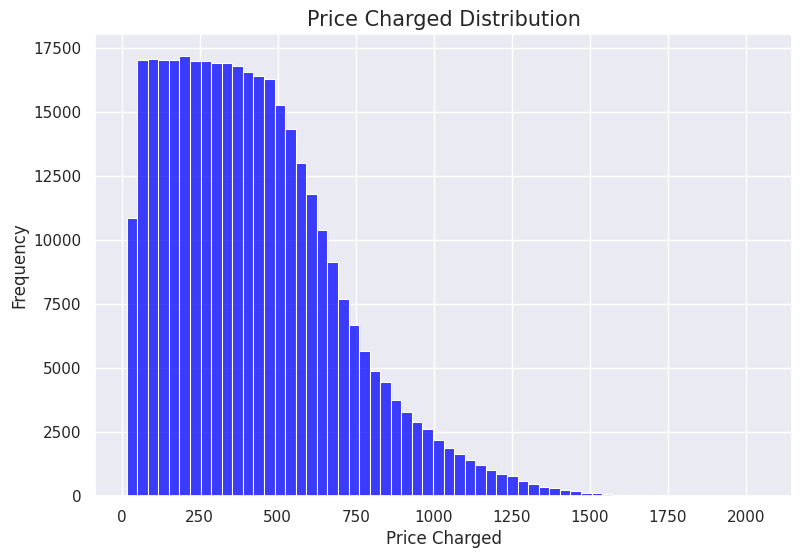

In [30]:
plt.figure(figsize=(9,6))
sns.histplot(data=merge_data, x="Price Charged",bins=60 , color= 'blue')
plt.title('Price Charged Distribution', fontsize=15)
plt.ylabel('Frequency')
plt.xlabel('Price Charged')

#### Day of week ride count and company distribution

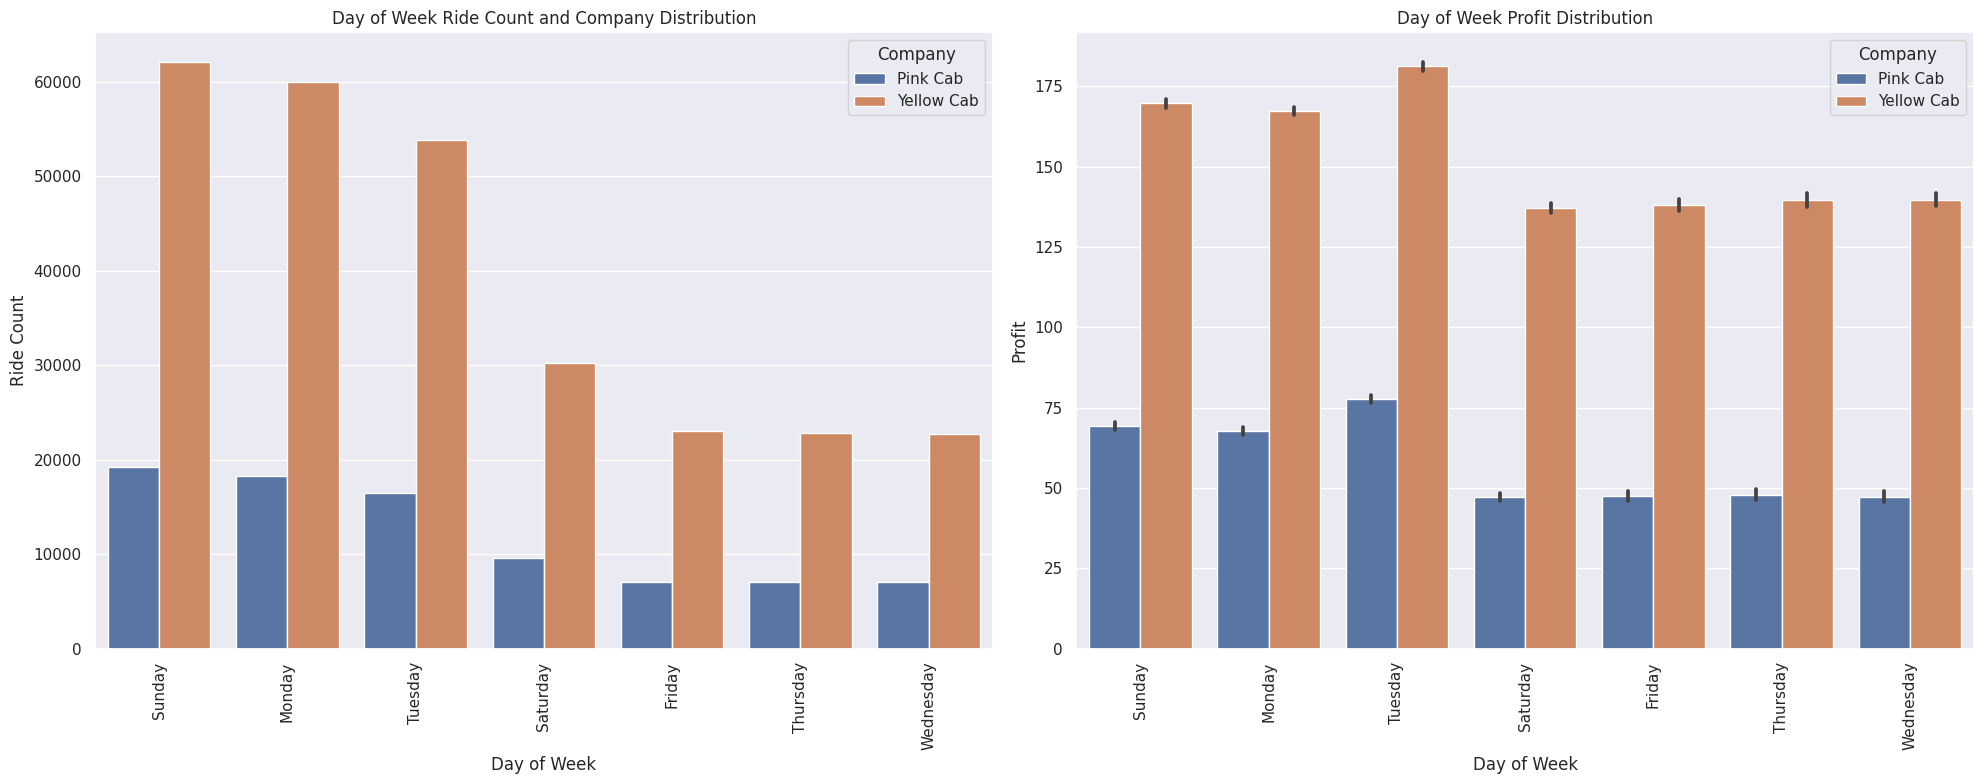

In [31]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20,8))

# Plot 1 - Day of week ride count and company distribution
sns.countplot(x='day_of_week', data=merge_data, order=merge_data['day_of_week'].value_counts().index, hue='Company', ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
ax1.set_xlabel('Day of Week')
ax1.set_ylabel('Ride Count')
ax1.set_title('Day of Week Ride Count and Company Distribution')

# Plot 2 - Day of week profit distribution
sns.barplot(x='day_of_week', y='profit', data=merge_data, hue='Company', order=merge_data['day_of_week'].value_counts().index, ax=ax2)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)
ax2.set_xlabel('Day of Week')
ax2.set_ylabel('Profit')
ax2.set_title('Day of Week Profit Distribution')

plt.tight_layout()
plt.show()

### Cost per Mile

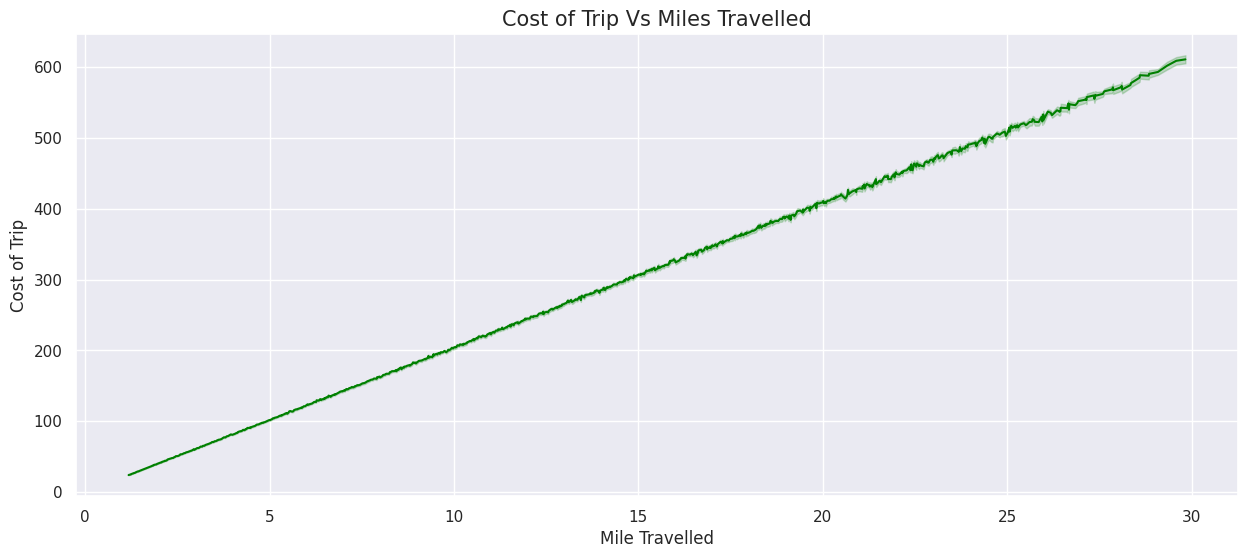

In [32]:
plt.figure(figsize=(15,6))
sns.lineplot(data=merge_data, x="Miles Travelled",y='Cost of Trip', color= 'green')
plt.title('Cost of Trip Vs Miles Travelled', fontsize=15)
plt.xlabel('Mile Travelled')
plt.ylabel('Cost of Trip')
plt.show()

#### Number of trips per city

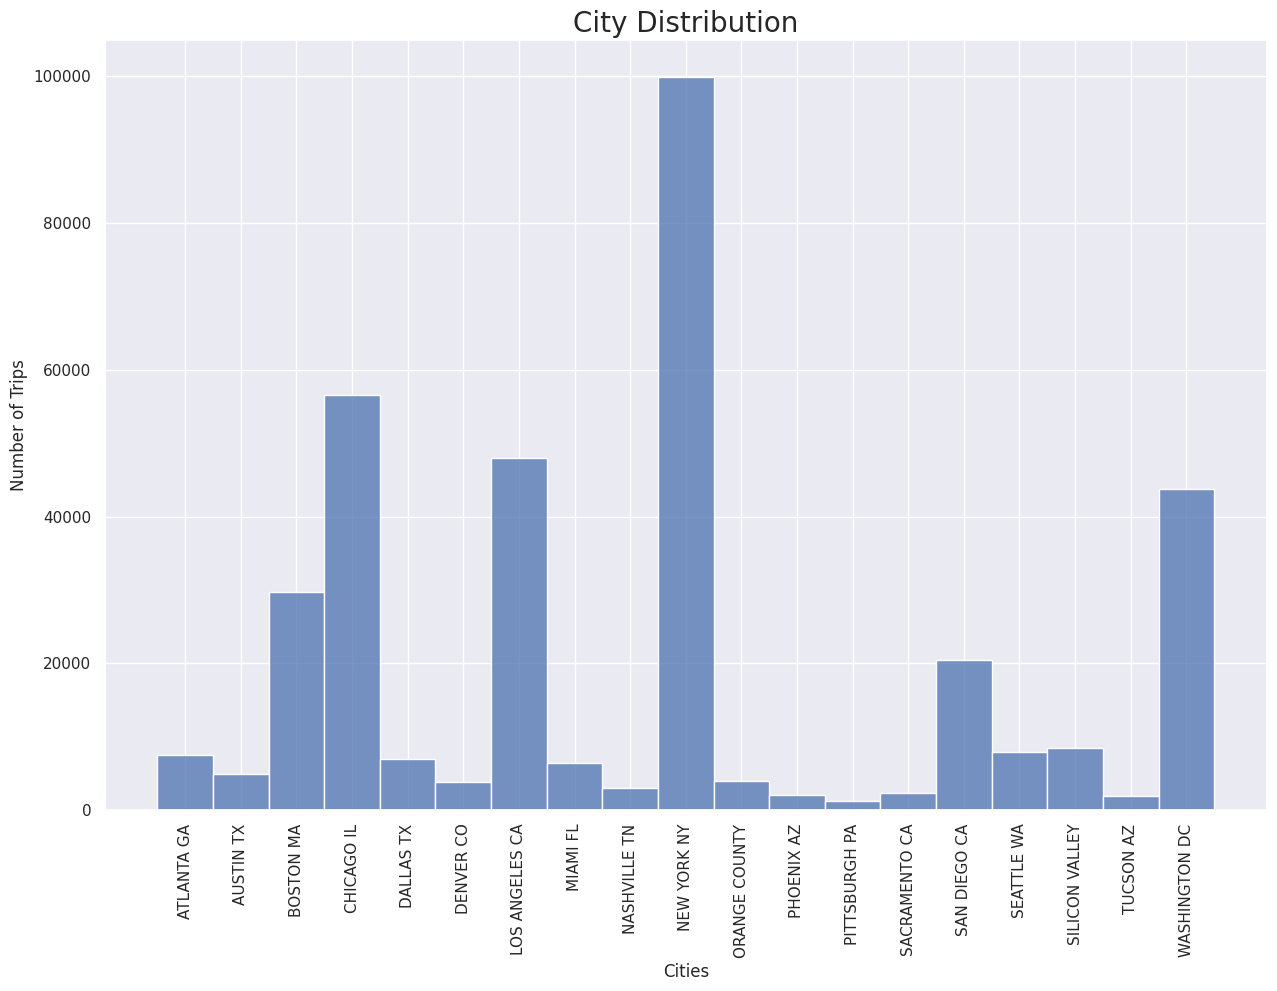

In [33]:
# number of trips per city
plt.figure(figsize=(15,10))

#create a histplot of the cities and their number of trips per city
ax=sns.histplot(data=merge_data, x="City",bins=40)
plt.setp( ax.get_xticklabels(),rotation=90)

plt.title('City Distribution', fontsize=20)
# set the chart title and axis labels
plt.ylabel('Number of Trips')
plt.xlabel('Cities')
plt.show()

#### Transaction analysis

In [34]:
# Transaction analysis
revenue_sum = merge_data.groupby('Company')['Price Charged'].sum()
ride_count = merge_data.groupby('Company')['Transaction ID'].nunique()
avg_fare = merge_data.groupby('Company')['Price Charged'].mean()


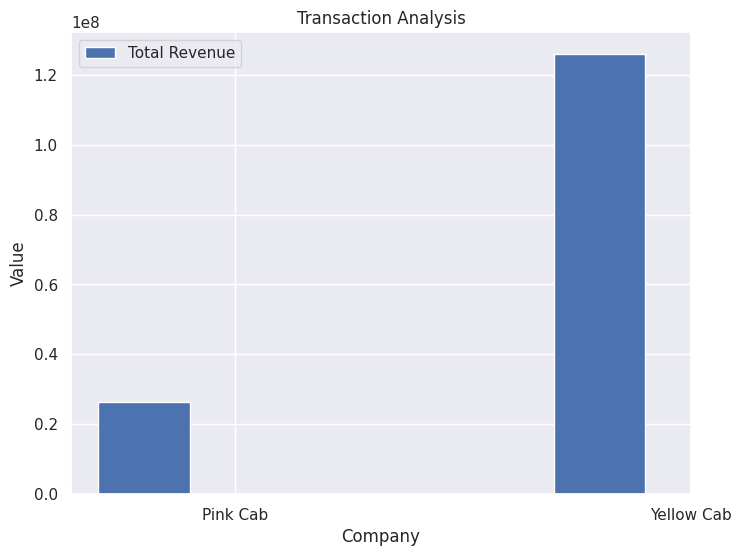

In [35]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the data
revenue_sum = merge_data.groupby('Company')['Price Charged'].sum()
ride_count = merge_data.groupby('Company')['Transaction ID'].nunique()
avg_fare = merge_data.groupby('Company')['Price Charged'].mean()

# Create the figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Define the x positions of the bars
x = np.arange(len(revenue_sum.index))

# Define the width of the bars
width = 0.2

# Plot the bars for total revenue
rects1 = ax.bar(x - width, revenue_sum.values, width, label='Total Revenue', color='b')

# Add labels and title
ax.set_xlabel('Company')
ax.set_ylabel('Value')
ax.set_title('Transaction Analysis')
ax.set_xticks(x)
ax.set_xticklabels(revenue_sum.index)
ax.legend()

# Show the plot
plt.show()


#### Payment mode analysis

In [36]:
# Payment mode analysis
payment_mode_count = merge_data.groupby(['Company', 'Payment_Mode'])['Transaction ID'].nunique()

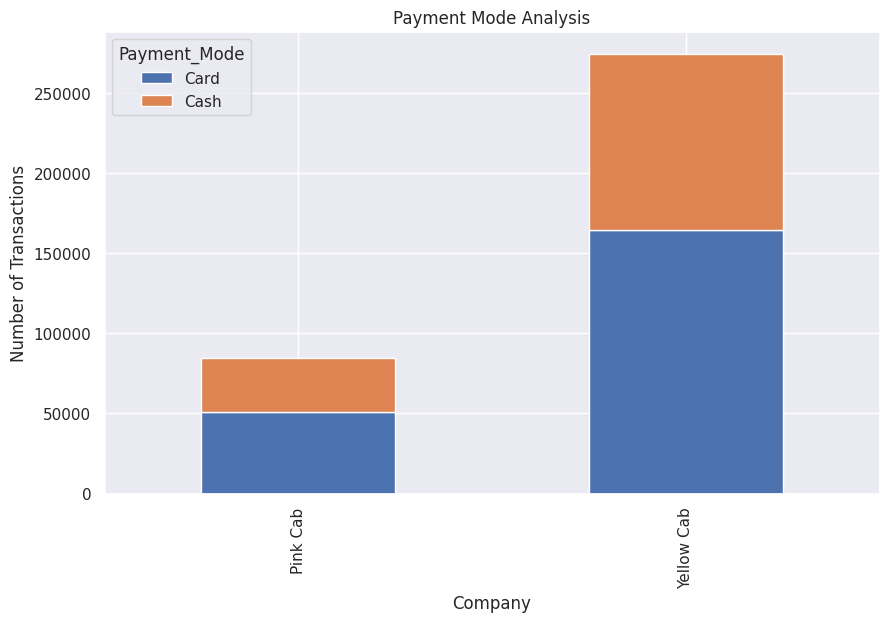

In [37]:
# Aggregate the data by company and payment mode
payment_mode_count = merge_data.groupby(['Company', 'Payment_Mode'])['Transaction ID'].nunique()

# Reshape the data for plotting
payment_mode_count = payment_mode_count.unstack(level=1)

# Create the stacked bar chart
payment_mode_count.plot(kind='bar', stacked=True, figsize=(10, 6))

# Add labels and title
plt.xlabel('Company')
plt.ylabel('Number of Transactions')
plt.title('Payment Mode Analysis')

# Show the plot
plt.show()


The most accepted form of payment is through Card for both the yellow and pink company.

#### City analysis

In [38]:
# City analysis
population_sum = Cities['Population'].sum()
cab_users_sum = Cities['Users'].sum()
company_market_share = merge_data.groupby('Company')['Transaction ID'].nunique() / merge_data['Transaction ID'].nunique()

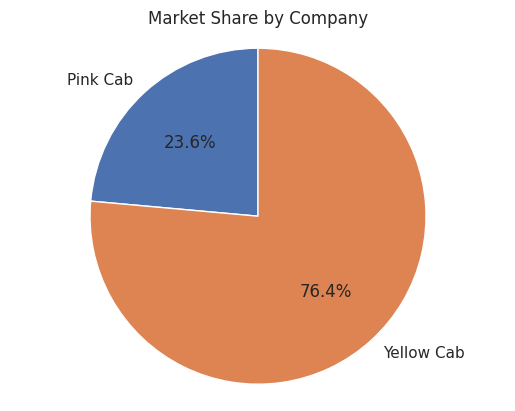

In [39]:
import matplotlib.pyplot as plt

# Calculate market share for each company
market_share = company_market_share.values.tolist()

# Create a pie chart for market share
plt.pie(market_share, labels=company_market_share.index, autopct='%1.1f%%', startangle=90)
plt.title('Market Share by Company')
plt.axis('equal')
plt.show()



The yellow cab company has the 76.4% of the market share.

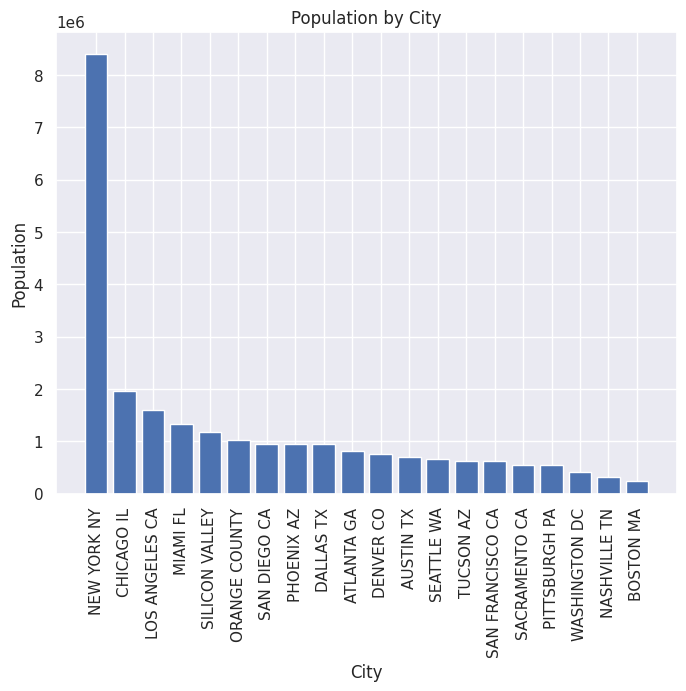

In [40]:
# Create a bar chart for population and cab users
plt.figure(figsize=(8, 6))
plt.bar(Cities['City'], Cities['Population'])
plt.title('Population by City')
plt.xlabel('City')
plt.ylabel('Population')
plt.xticks(rotation=90)

plt.show()


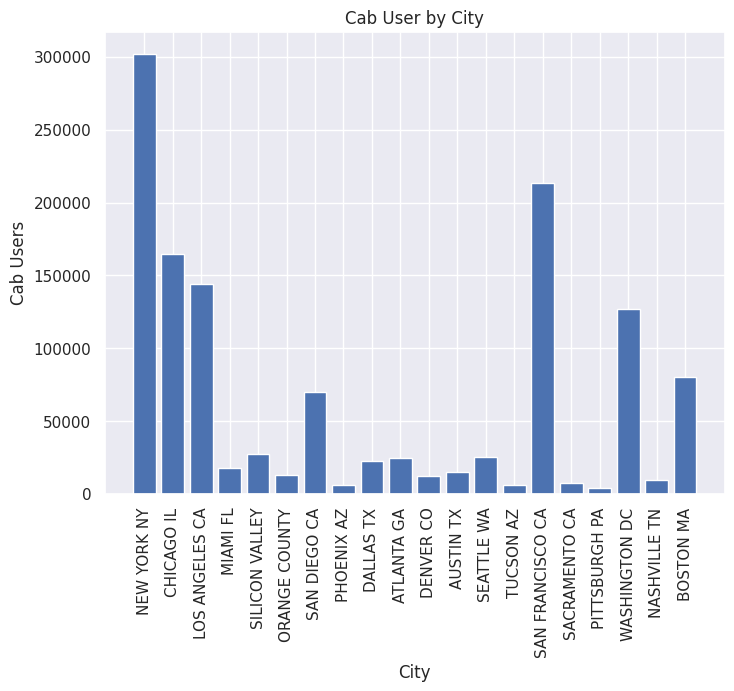

In [41]:
# Cab users chart
plt.figure(figsize=(8, 6))
plt.bar(Cities['City'], Cities['Users'])
plt.title('Cab User by City')
plt.xlabel('City')
plt.ylabel('Cab Users')
plt.xticks(rotation=90)

plt.show()

####  Competitive analysis

In [42]:
# Competitive analysis
price_mean = merge_data.groupby('Company')['Price Charged'].mean()

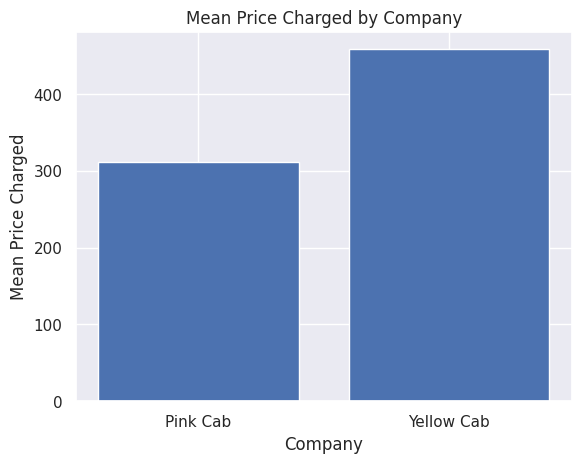

In [43]:
# Calculate mean price charged for each company
price_mean = merge_data.groupby('Company')['Price Charged'].mean()

# Create a bar chart for mean price charged
plt.bar(price_mean.index, price_mean)
plt.title('Mean Price Charged by Company')
plt.xlabel('Company')
plt.ylabel('Mean Price Charged')
plt.show()

The yellow cab charge over $400.00 and pink cab charge less slightly above $300.00. 


#### Monthly Profits





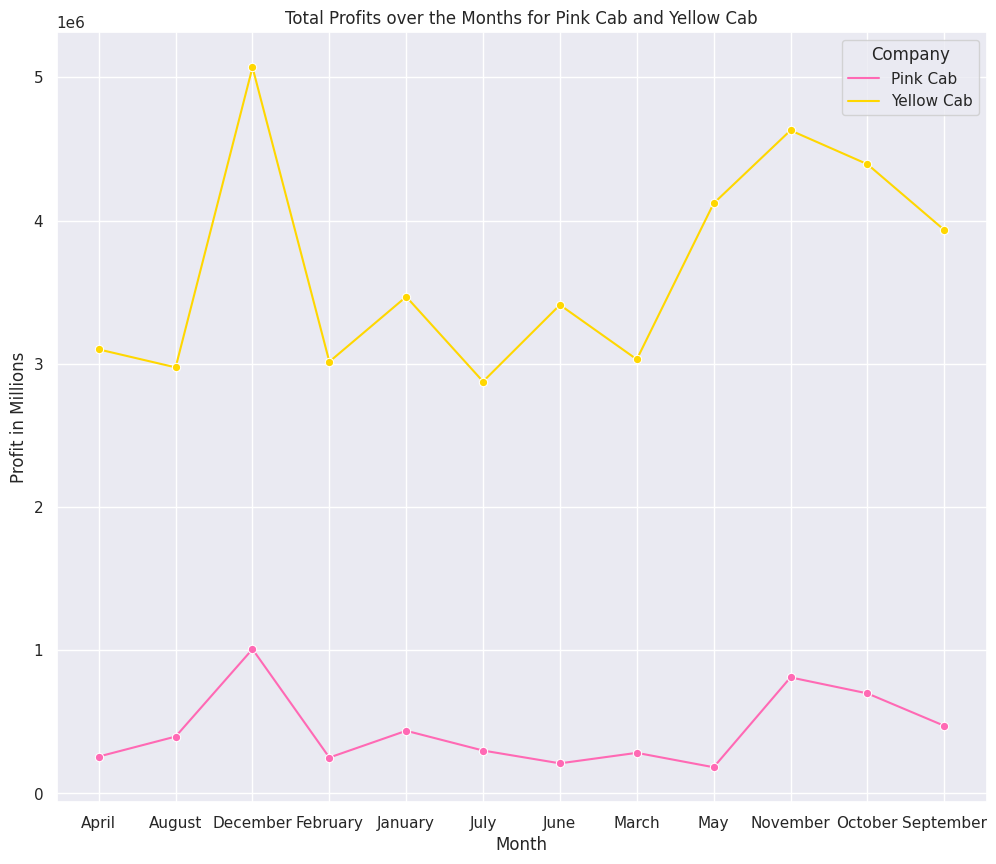

month      Company   
April      Pink Cab      2.575972e+05
           Yellow Cab    3.100095e+06
August     Pink Cab      3.971947e+05
           Yellow Cab    2.974603e+06
December   Pink Cab      1.007501e+06
           Yellow Cab    5.070099e+06
February   Pink Cab      2.505241e+05
           Yellow Cab    3.014095e+06
January    Pink Cab      4.375110e+05
           Yellow Cab    3.468062e+06
July       Pink Cab      2.995326e+05
           Yellow Cab    2.875781e+06
June       Pink Cab      2.101102e+05
           Yellow Cab    3.410859e+06
March      Pink Cab      2.834454e+05
           Yellow Cab    3.030404e+06
May        Pink Cab      1.828247e+05
           Yellow Cab    4.119640e+06
November   Pink Cab      8.102745e+05
           Yellow Cab    4.629365e+06
October    Pink Cab      6.985293e+05
           Yellow Cab    4.393202e+06
September  Pink Cab      4.722835e+05
           Yellow Cab    3.934168e+06
Name: profit, dtype: float64


In [44]:
plt.figure(figsize=(12,10))
# group the data by month and company and calculate the total profits
monthly_profits = merge_data.groupby(['month', 'Company'])['profit'].sum()

# create a line plot of monthly profits for each company

sns.lineplot(data=monthly_profits, x=monthly_profits.index.get_level_values(0), y=monthly_profits.values, hue=monthly_profits.index.get_level_values(1), marker='o', palette=['hotpink', 'gold'])

# add markers for profit and loss points
for i, val in enumerate(monthly_profits.values):
    month = monthly_profits.index[i][0]
    company = monthly_profits.index[i][1]
    if val > 0:
        #ax.annotate(f'+${val:.2f}', xy=(month, val), xytext=(month+0.1, val+0.1))
        ax.scatter(month, val, marker='o', color='green')
    else:
        ax.annotate(f'-${abs(val):.2f}', xy=(month, val), xytext=(month+0.1, val-0.1))
        ax.scatter(month, val, marker='o', color='red')

# set the chart title and axis labels
plt.title('Total Profits over the Months for Pink Cab and Yellow Cab')
plt.xlabel('Month')
plt.ylabel('Profit in Millions')

# display the chart
plt.show()

# print the result
print(monthly_profits)

plt.show()


In November both pink cab made more profit then the yellow cab.


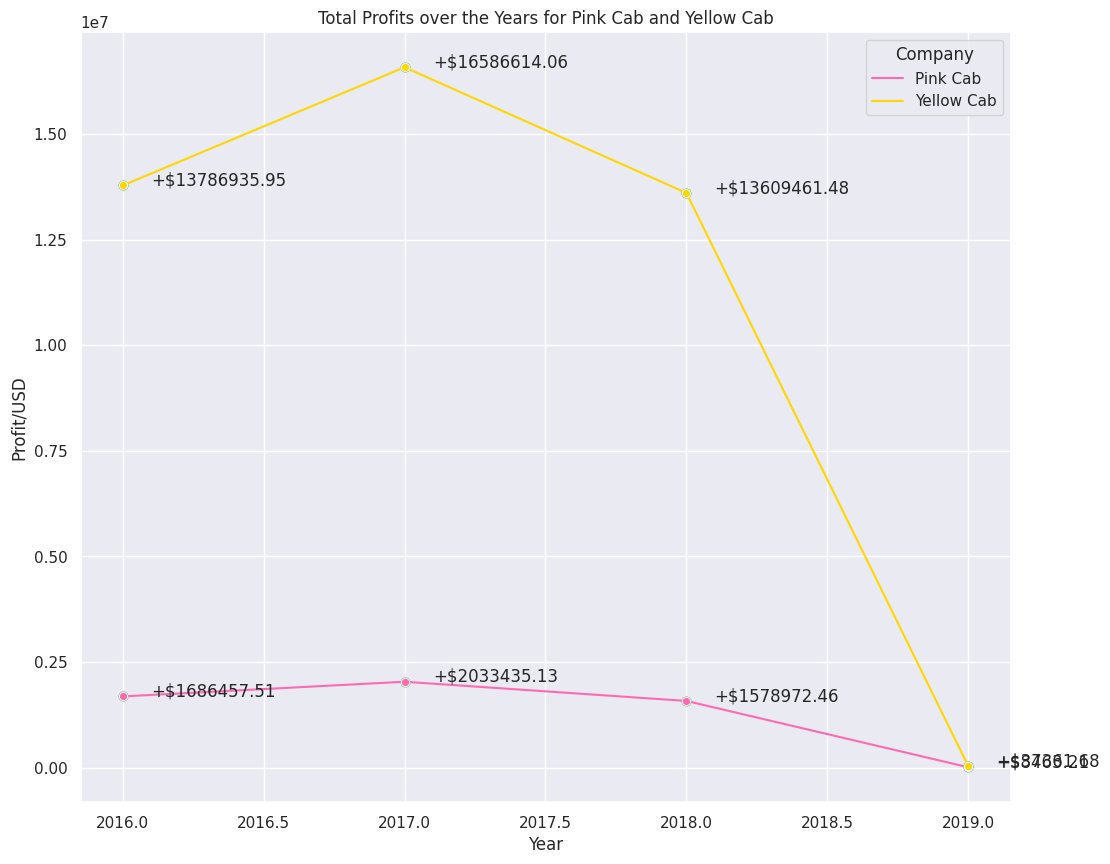

year  Company   
2016  Pink Cab      1.686458e+06
      Yellow Cab    1.378694e+07
2017  Pink Cab      2.033435e+06
      Yellow Cab    1.658661e+07
2018  Pink Cab      1.578972e+06
      Yellow Cab    1.360946e+07
2019  Pink Cab      8.463212e+03
      Yellow Cab    3.736168e+04
Name: profit, dtype: float64


In [45]:
# group the data by year and company and calculate the total profits
fig, ax = plt.subplots(figsize=(12, 10))
yearly_profits = merge_data.groupby(['year', 'Company'])['profit'].sum()

# create a line plot of yearly profits for each company

sns.lineplot(data=yearly_profits, x=yearly_profits.index.get_level_values(0), y=yearly_profits.values, hue=yearly_profits.index.get_level_values(1), marker='o', palette=['hotpink', 'gold'])

# add markers for profit and loss points
for i, val in enumerate(yearly_profits.values):
    year = yearly_profits.index[i][0]
    company = yearly_profits.index[i][1]
    if val > 0:
        ax.annotate(f'+${val:.2f}', xy=(year, val), xytext=(year+0.1, val+0.1))
        ax.scatter(year, val, marker='o', color='green')
    else:
        ax.annotate(f'-${abs(val):.2f}', xy=(year, val), xytext=(year+0.1, val-0.1))
        ax.scatter(year, val, marker='o', color='red')

# set the chart title and axis labels
plt.title('Total Profits over the Years for Pink Cab and Yellow Cab')
plt.xlabel('Year')
plt.ylabel('Profit/USD')

# display the chart
plt.show()

# print the result
print(yearly_profits)




Profit per Company decreases over time in both companies where 2019 recorded the least with Pink Cab 8463212e,Yellow Cab 37,36168


### **Hypothesis Testing**

Hypothesis 1: The demand for cab services is positively correlated with the population of the city

Hypothesis 2: The profit margin increases with increase in number of customers.

Hypothesis 3: The profit margin varies with the city

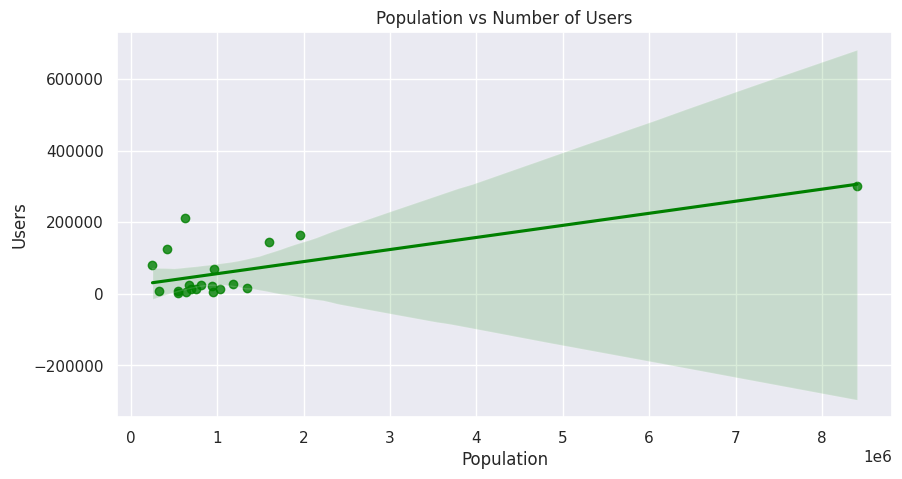

In [46]:

plt.figure(figsize=(10,5))
sns.regplot(x='Population', y='Users', data=Cities, color='green')
plt.title('Population vs Number of Users')
plt.show()

The scatter plot shows a positive correlation between the population of a city and the number of cab users.

In [47]:
# Join cab_data and transaction_id datasets based on Transaction ID column
cab_transaction = Cab.merge(Transactions, on='Transaction ID')


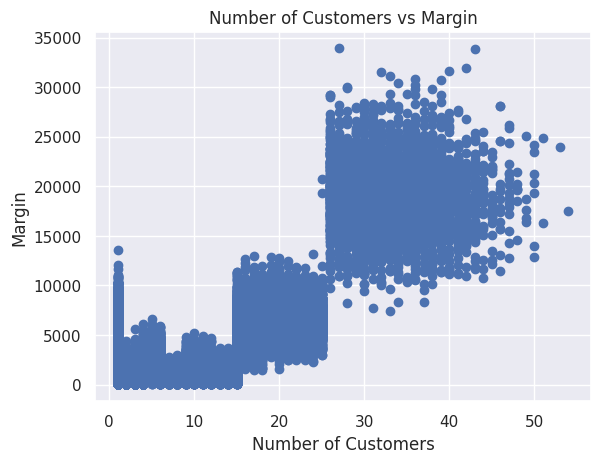

In [48]:
# Create scatter plot
plt.scatter(cab_transaction['Customer ID'].value_counts(), cab_transaction.groupby('Customer ID')['Price Charged'].sum())
plt.title('Number of Customers vs Margin')
plt.xlabel('Number of Customers')
plt.ylabel('Margin')
plt.show()


Based on the analysis, we can conclude that there is a positive correlation between the population of a city and the number of cab users, and there is also a positive correlation between the number of customers and margin. Therefore, increasing the number of customers by expanding to high population cities would likely result in increased margin for the cab companies.

In [55]:
Cab['Profit Margin'] = (Cab['Price Charged'] - Cab['Cost of Trip']) / Cab['Price Charged']
Cab['Profit Margin'].head()


0    0.154509
1    0.066010
2    0.220192
3    0.068357
4    0.146955
Name: Profit Margin, dtype: float64

In [58]:
# Calculate the profit margin for each transaction
Cab['Profit Margin'] = (Cab['Price Charged'] - Cab['Cost of Trip']) / Cab['Price Charged']

# Merge the Cab and City data frames
merge_data = pd.merge(Cab, Cities, on='City', how='left')

# Calculate the average profit margin for each city
profit_by_city_df = merge_data.groupby('City')['Profit Margin'].mean().reset_index()



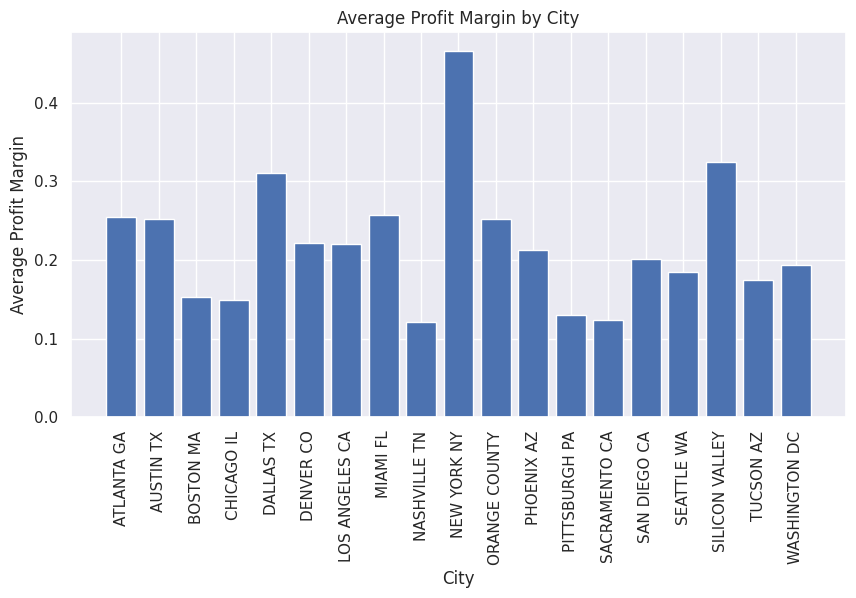

In [59]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.bar(profit_by_city_df['City'], profit_by_city_df['Profit Margin'])
plt.xticks(rotation=90)
plt.xlabel('City')
plt.ylabel('Average Profit Margin')
plt.title('Average Profit Margin by City')
plt.show()


This gives us a bar chart showing the average profit margin for each city with New york having the highest average profit margin

### Recommendation

Here are my recommendations based on the research:

- Since there is a positive correlation between the population of a city and the number of taxi users, it would be prudent for cab companies to expand their services in cities with a high population density.

- The analysis demonstrates that the profit margin increases as the number of consumers rises. To increase profits, taxi companies should concentrate on acquiring and expanding their customer base.

- The profit margin differs by city. To optimize profits, cab companies should concentrate their operations in cities with a high profit margin.

- Understanding the demographics of their consumers would allow taxi companies to tailor their services and marketing strategies accordingly.

Lastly, cab companies should continue to monitor their performance over time and modify their strategies as needed to maintain market competitiveness.
